In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import Imputer
from sklearn.model_selection import train_test_split
# plt.rcParams['font.sans-serif'] = 'SimHei'
plt.rcParams['axes.unicode_minus'] = False
plt.style.use('ggplot')

In [56]:
# 导入数据
data = pd.read_csv('/Users/zzk/code/jupyter-notebook/Datawhale/Task-1/dh-task1.csv'
                   ,encoding='gbk')

#查看数据前5行
data.head() 

,Unnamed: 0,custid,trade_no,bank_card_no,low_volume_percent,middle_volume_percent,take_amount_in_later_12_month_highest,trans_amount_increase_rate_lately,trans_activity_month,trans_activity_day,...,loans_max_limit,loans_avg_limit,consfin_credit_limit,consfin_credibility,consfin_org_count_current,consfin_product_count,consfin_max_limit,consfin_avg_limit,latest_query_day,loans_latest_day
0,5,2791858,20180507115231274000000023057383,卡号1,0.01,0.99,0,0.90,0.55,0.313,...,2900.0,1688.0,1200.0,75.0,1.0,2.0,1200.0,1200.0,12.0,18.0
1,10,534047,20180507121002192000000023073000,卡号1,0.02,0.94,2000,1.28,1.00,0.458,...,3500.0,1758.0,15100.0,80.0,5.0,6.0,22800.0,9360.0,4.0,2.0
2,12,2849787,20180507125159718000000023114911,卡号1,0.04,0.96,0,1.00,1.00,0.114,...,1600.0,1250.0,4200.0,87.0,1.0,1.0,4200.0,4200.0,2.0,6.0
3,13,1809708,20180507121358683000000388283484,卡号1,0.00,0.96,2000,0.13,0.57,0.777,...,3200.0,1541.0,16300.0,80.0,5.0,5.0,30000.0,12180.0,2.0,4.0
4,14,2499829,20180507115448545000000388205844,卡号1,0.01,0.99,0,0.46,1.00,0.175,...,2300.0,1630.0,8300.0,79.0,2.0,2.0,8400.0,8250.0,22.0,120.0


In [57]:
#  查看数据概况
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4754 entries, 0 to 4753
Data columns (total 90 columns):
Unnamed: 0                                    4754 non-null int64
custid                                        4754 non-null int64
trade_no                                      4754 non-null object
bank_card_no                                  4754 non-null object
low_volume_percent                            4752 non-null float64
middle_volume_percent                         4752 non-null float64
take_amount_in_later_12_month_highest         4754 non-null int64
trans_amount_increase_rate_lately             4751 non-null float64
trans_activity_month                          4752 non-null float64
trans_activity_day                            4752 non-null float64
transd_mcc                                    4752 non-null float64
trans_days_interval_filter                    4746 non-null float64
trans_days_interval                           4752 non-null float64
regional_mobility

In [58]:
#目标变量分布
print (data.status.value_counts())

0    3561
1    1193
Name: status, dtype: int64


/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


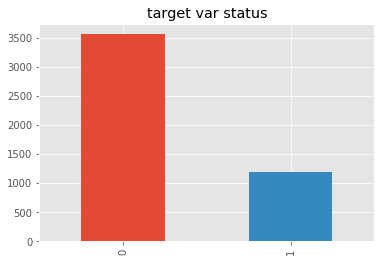

In [59]:
data.status.value_counts().plot(kind='bar')
plt.title('target var status')
plt.show()

In [60]:
data.describe()

,Unnamed: 0,custid,low_volume_percent,middle_volume_percent,take_amount_in_later_12_month_highest,trans_amount_increase_rate_lately,trans_activity_month,trans_activity_day,transd_mcc,trans_days_interval_filter,...,loans_max_limit,loans_avg_limit,consfin_credit_limit,consfin_credibility,consfin_org_count_current,consfin_product_count,consfin_max_limit,consfin_avg_limit,latest_query_day,loans_latest_day
count,4754.000000,4.754000e+03,4752.000000,4752.000000,4754.000000,4751.000000,4752.000000,4752.000000,4752.000000,4746.000000,...,4457.000000,4457.000000,4457.000000,4457.000000,4457.000000,4457.000000,4457.000000,4457.000000,4450.000000,4457.000000
mean,6008.414178,1.690993e+06,0.021806,0.901294,1940.197728,14.160674,0.804411,0.365425,17.502946,29.029920,...,3390.038142,1820.357864,9187.009199,76.042630,4.732331,5.227507,16153.690823,8007.696881,24.112809,55.181512
std,3452.071428,1.034235e+06,0.041527,0.144856,3923.971494,694.180473,0.196920,0.170196,4.475616,22.722432,...,1474.206546,583.418291,7371.257043,14.536819,2.974596,3.409292,14301.037628,5679.418585,37.725724,53.486408
min,5.000000,1.140000e+02,0.000000,0.000000,0.000000,0.000000,0.120000,0.033000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.000000,-2.000000
25%,3106.000000,7.593358e+05,0.010000,0.880000,0.000000,0.615000,0.670000,0.233000,15.000000,16.000000,...,2300.000000,1535.000000,4800.000000,77.000000,2.000000,3.000000,7800.000000,4737.000000,5.000000,10.000000
50%,6006.500000,1.634942e+06,0.010000,0.960000,500.000000,0.970000,0.860000,0.350000,17.000000,23.000000,...,3100.000000,1810.000000,7700.000000,79.000000,4.000000,5.000000,13800.000000,7050.000000,14.000000,36.000000
75%,8999.000000,2.597905e+06,0.020000,0.990000,2000.000000,1.600000,1.000000,0.480000,20.000000,32.000000,...,4300.000000,2100.000000,11700.000000,80.000000,7.000000,7.000000,20400.000000,10000.000000,24.000000,91.000000
max,11992.000000,4.004694e+06,1.000000,1.000000,68000.000000,47596.740000,1.000000,0.941000,42.000000,285.000000,...,10000.000000,6900.000000,87100.000000,87.000000,18.000000,20.000000,266400.000000,82800.000000,360.000000,323.000000


In [61]:
'''Unnamed: 0、custid、trade_no、id_name这些变量都是唯一标识记录，故对建模无关，而三个日期变量不知其具体含义，无法推导其业务逻辑，建模中难以
有效利用，不取'''
data_1 = data.drop(['Unnamed: 0', 'custid', 'trade_no', 'id_name', 'first_transaction_time', 'latest_query_time', 'loans_latest_time'], axis=1)
data_1.shape

(4754, 83)

In [63]:
# 缺失值探索
miss = data_1.isnull().sum()
miss

bank_card_no                                0
low_volume_percent                          2
middle_volume_percent                       2
take_amount_in_later_12_month_highest       0
trans_amount_increase_rate_lately           3
trans_activity_month                        2
trans_activity_day                          2
transd_mcc                                  2
trans_days_interval_filter                  8
trans_days_interval                         2
regional_mobility                           2
student_feature                          2998
repayment_capability                        0
is_high_user                                0
number_of_trans_from_2011                   2
historical_trans_amount                     0
historical_trans_day                        2
rank_trad_1_month                           2
trans_amount_3_month                        0
avg_consume_less_12_valid_month             2
abs                                         0
top_trans_count_last_1_month      

In [64]:
miss_rate = data_1.isnull().sum() / data_1.shape[0]
miss_rate

bank_card_no                             0.000000
low_volume_percent                       0.000421
middle_volume_percent                    0.000421
take_amount_in_later_12_month_highest    0.000000
trans_amount_increase_rate_lately        0.000631
trans_activity_month                     0.000421
trans_activity_day                       0.000421
transd_mcc                               0.000421
trans_days_interval_filter               0.001683
trans_days_interval                      0.000421
regional_mobility                        0.000421
student_feature                          0.630627
repayment_capability                     0.000000
is_high_user                             0.000000
number_of_trans_from_2011                0.000421
historical_trans_amount                  0.000000
historical_trans_day                     0.000421
rank_trad_1_month                        0.000421
trans_amount_3_month                     0.000000
avg_consume_less_12_valid_month          0.000421


In [65]:
print (' '*35+'缺失个数'+' '*5+'缺失率', pd.concat([miss, miss_rate], axis=1))
print ('缺失率大于30%的变量：', (miss_rate > 0.3)[(miss_rate > 0.3) == True].index[0], end='')

                                   缺失个数     缺失率                                           0         1
bank_card_no                              0  0.000000
low_volume_percent                        2  0.000421
middle_volume_percent                     2  0.000421
take_amount_in_later_12_month_highest     0  0.000000
trans_amount_increase_rate_lately         3  0.000631
trans_activity_month                      2  0.000421
trans_activity_day                        2  0.000421
transd_mcc                                2  0.000421
trans_days_interval_filter                8  0.001683
trans_days_interval                       2  0.000421
regional_mobility                         2  0.000421
student_feature                        2998  0.630627
repayment_capability                      0  0.000000
is_high_user                              0  0.000000
number_of_trans_from_2011                 2  0.000421
historical_trans_amount                   0  0.000000
historical_trans_day              

1.大部分变量存在缺失值，后续分别进行处理 2.student_feature变量缺失比例大于30%，后续删除该变量

In [66]:
#数据类型分析
data_1.dtypes

bank_card_no                              object
low_volume_percent                       float64
middle_volume_percent                    float64
take_amount_in_later_12_month_highest      int64
trans_amount_increase_rate_lately        float64
trans_activity_month                     float64
trans_activity_day                       float64
transd_mcc                               float64
trans_days_interval_filter               float64
trans_days_interval                      float64
regional_mobility                        float64
student_feature                          float64
repayment_capability                       int64
is_high_user                               int64
number_of_trans_from_2011                float64
historical_trans_amount                    int64
historical_trans_day                     float64
rank_trad_1_month                        float64
trans_amount_3_month                       int64
avg_consume_less_12_valid_month          float64
abs                 

In [67]:
#查看object型变量取值分布情况
obj_col = (data_1.dtypes == 'object')[(data_1.dtypes == 'object') == True].index.tolist()
for col in obj_col:
    print (data_1[col].value_counts())
    print ('\n')

卡号1    4754
Name: bank_card_no, dtype: int64


一线城市    3403
三线城市    1064
境外       150
二线城市     131
其他城市       4
Name: reg_preference_for_trad, dtype: int64


xs    4754
Name: source, dtype: int64




1.变量bank_card_no与source取值单一，无意义，后续删除 2.变量reg_preference_for_trad取值分布不均衡，后续将合并样本量少的类别

In [68]:
#查找重复值
(data_1.duplicated())[data_1.duplicated() == True].index

Int64Index([], dtype='int64')

表明无重复数据

In [69]:
# 数据的描述性分析
data_1.describe()

,low_volume_percent,middle_volume_percent,take_amount_in_later_12_month_highest,trans_amount_increase_rate_lately,trans_activity_month,trans_activity_day,transd_mcc,trans_days_interval_filter,trans_days_interval,regional_mobility,...,loans_max_limit,loans_avg_limit,consfin_credit_limit,consfin_credibility,consfin_org_count_current,consfin_product_count,consfin_max_limit,consfin_avg_limit,latest_query_day,loans_latest_day
count,4752.000000,4752.000000,4754.000000,4751.000000,4752.000000,4752.000000,4752.000000,4746.000000,4752.000000,4752.000000,...,4457.000000,4457.000000,4457.000000,4457.000000,4457.000000,4457.000000,4457.000000,4457.000000,4450.000000,4457.000000
mean,0.021806,0.901294,1940.197728,14.160674,0.804411,0.365425,17.502946,29.029920,21.751263,2.678662,...,3390.038142,1820.357864,9187.009199,76.042630,4.732331,5.227507,16153.690823,8007.696881,24.112809,55.181512
std,0.041527,0.144856,3923.971494,694.180473,0.196920,0.170196,4.475616,22.722432,16.474916,0.890360,...,1474.206546,583.418291,7371.257043,14.536819,2.974596,3.409292,14301.037628,5679.418585,37.725724,53.486408
min,0.000000,0.000000,0.000000,0.000000,0.120000,0.033000,2.000000,0.000000,4.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.000000,-2.000000
25%,0.010000,0.880000,0.000000,0.615000,0.670000,0.233000,15.000000,16.000000,12.000000,2.000000,...,2300.000000,1535.000000,4800.000000,77.000000,2.000000,3.000000,7800.000000,4737.000000,5.000000,10.000000
50%,0.010000,0.960000,500.000000,0.970000,0.860000,0.350000,17.000000,23.000000,17.000000,3.000000,...,3100.000000,1810.000000,7700.000000,79.000000,4.000000,5.000000,13800.000000,7050.000000,14.000000,36.000000
75%,0.020000,0.990000,2000.000000,1.600000,1.000000,0.480000,20.000000,32.000000,27.000000,3.000000,...,4300.000000,2100.000000,11700.000000,80.000000,7.000000,7.000000,20400.000000,10000.000000,24.000000,91.000000
max,1.000000,1.000000,68000.000000,47596.740000,1.000000,0.941000,42.000000,285.000000,234.000000,5.000000,...,10000.000000,6900.000000,87100.000000,87.000000,18.000000,20.000000,266400.000000,82800.000000,360.000000,323.000000


In [70]:
#数值型变量中的单一值识别，即查看有没标准差为0的变量
(data_1.std())[data_1.std() == 0]

Series([], dtype: float64)

/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


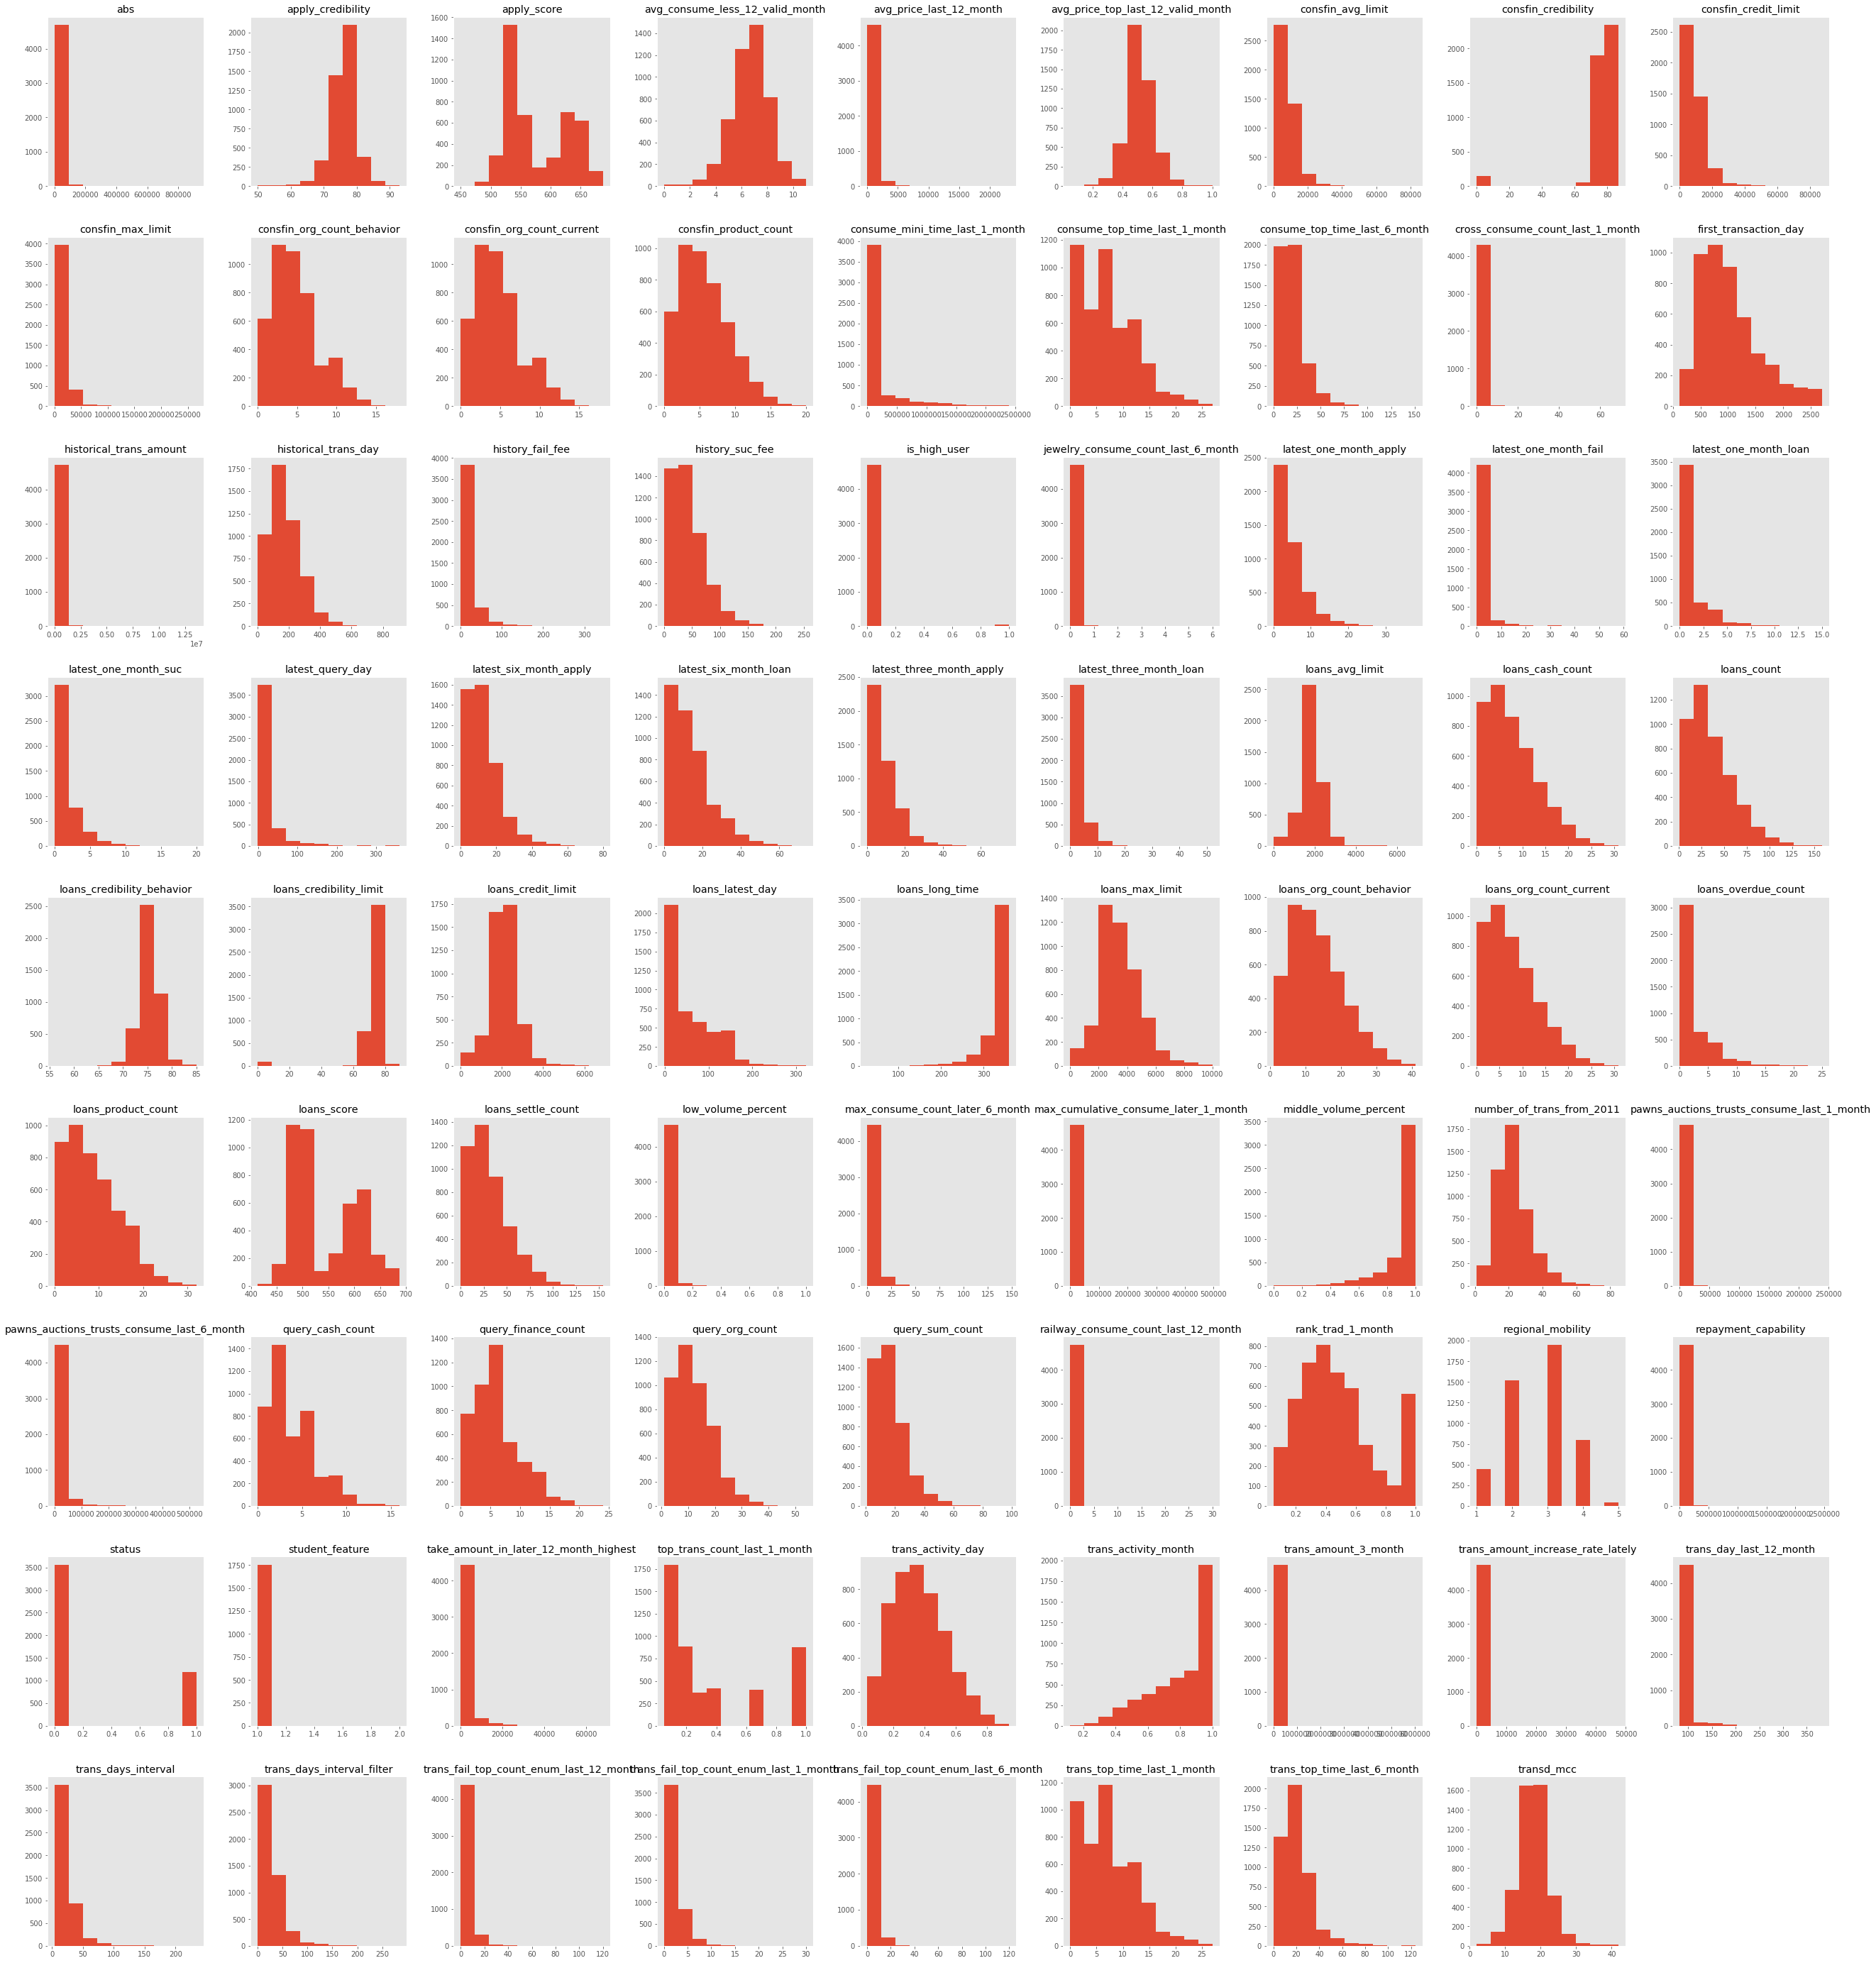

In [74]:
#数值型变量分布情况
data_1.hist(figsize=(45, 50), grid=False)
plt.show()

以上可以看出，大部分数值型变量为偏态分布，考虑到计算均值的时候会受到长尾值的影响，缺失值填充使用均值不合适，决定先采用中位数进行数值型变量填充

In [75]:
#剔除单一取值、缺失率过大的变量
data_2 = data_1.drop(['bank_card_no', 'source', 'student_feature'], axis=1)
print (data_2.shape)

(4754, 80)


In [76]:
#划分特征集与目标变量
x = data_2.drop('status', axis=1)
y = data_2.status

缺失填补： 1.数值型利用中位数填充 2.object型用众数填充



In [77]:
#取出数值型变量
x_numeric = x.drop('reg_preference_for_trad', axis=1)

In [78]:
nan_model = Imputer(missing_values='NaN', strategy='median', axis=0)
x_numeric_result = pd.DataFrame(nan_model.fit_transform(x_numeric), columns=x_numeric.columns)

In [79]:
x_numeric_result.head()


,low_volume_percent,middle_volume_percent,take_amount_in_later_12_month_highest,trans_amount_increase_rate_lately,trans_activity_month,trans_activity_day,transd_mcc,trans_days_interval_filter,trans_days_interval,regional_mobility,...,loans_max_limit,loans_avg_limit,consfin_credit_limit,consfin_credibility,consfin_org_count_current,consfin_product_count,consfin_max_limit,consfin_avg_limit,latest_query_day,loans_latest_day
0,0.01,0.99,0.0,0.90,0.55,0.313,17.0,27.0,26.0,3.0,...,2900.0,1688.0,1200.0,75.0,1.0,2.0,1200.0,1200.0,12.0,18.0
1,0.02,0.94,2000.0,1.28,1.00,0.458,19.0,30.0,14.0,4.0,...,3500.0,1758.0,15100.0,80.0,5.0,6.0,22800.0,9360.0,4.0,2.0
2,0.04,0.96,0.0,1.00,1.00,0.114,13.0,68.0,22.0,1.0,...,1600.0,1250.0,4200.0,87.0,1.0,1.0,4200.0,4200.0,2.0,6.0
3,0.00,0.96,2000.0,0.13,0.57,0.777,22.0,14.0,6.0,3.0,...,3200.0,1541.0,16300.0,80.0,5.0,5.0,30000.0,12180.0,2.0,4.0
4,0.01,0.99,0.0,0.46,1.00,0.175,13.0,66.0,42.0,1.0,...,2300.0,1630.0,8300.0,79.0,2.0,2.0,8400.0,8250.0,22.0,120.0


In [80]:
#取出object型变量
obj_value = x['reg_preference_for_trad']
obj_value_result = obj_value.fillna(obj_value.value_counts().index[0])

In [81]:
#合并填充完的数据
x_result = pd.concat([x_numeric_result, obj_value_result], axis=1)
print (x_result.isnull().sum().sum()) #查看还有没有缺失值
x_result.head()

0


,low_volume_percent,middle_volume_percent,take_amount_in_later_12_month_highest,trans_amount_increase_rate_lately,trans_activity_month,trans_activity_day,transd_mcc,trans_days_interval_filter,trans_days_interval,regional_mobility,...,loans_avg_limit,consfin_credit_limit,consfin_credibility,consfin_org_count_current,consfin_product_count,consfin_max_limit,consfin_avg_limit,latest_query_day,loans_latest_day,reg_preference_for_trad
0,0.01,0.99,0.0,0.90,0.55,0.313,17.0,27.0,26.0,3.0,...,1688.0,1200.0,75.0,1.0,2.0,1200.0,1200.0,12.0,18.0,一线城市
1,0.02,0.94,2000.0,1.28,1.00,0.458,19.0,30.0,14.0,4.0,...,1758.0,15100.0,80.0,5.0,6.0,22800.0,9360.0,4.0,2.0,一线城市
2,0.04,0.96,0.0,1.00,1.00,0.114,13.0,68.0,22.0,1.0,...,1250.0,4200.0,87.0,1.0,1.0,4200.0,4200.0,2.0,6.0,一线城市
3,0.00,0.96,2000.0,0.13,0.57,0.777,22.0,14.0,6.0,3.0,...,1541.0,16300.0,80.0,5.0,5.0,30000.0,12180.0,2.0,4.0,三线城市
4,0.01,0.99,0.0,0.46,1.00,0.175,13.0,66.0,42.0,1.0,...,1630.0,8300.0,79.0,2.0,2.0,8400.0,8250.0,22.0,120.0,一线城市


In [82]:
#类别标记转换，并合并小类别
def trans(x):
    if x == '一线城市':
        n = 0
    elif x == '三线城市':
        n = 1
    else:
        n = 2
    return n
x_result['reg_preference_for_trad'] = x_result['reg_preference_for_trad'].map(trans)

In [83]:
#将类别变量转化成哑变量
x_result = pd.concat([x_result, pd.get_dummies(x_result['reg_preference_for_trad'], prefix='rpft')], axis=1)

In [84]:
x_result = x_result.drop('reg_preference_for_trad', axis=1)
x_result.shape

(4754, 81)

In [85]:
x_result.head()


,low_volume_percent,middle_volume_percent,take_amount_in_later_12_month_highest,trans_amount_increase_rate_lately,trans_activity_month,trans_activity_day,transd_mcc,trans_days_interval_filter,trans_days_interval,regional_mobility,...,consfin_credibility,consfin_org_count_current,consfin_product_count,consfin_max_limit,consfin_avg_limit,latest_query_day,loans_latest_day,rpft_0,rpft_1,rpft_2
0,0.01,0.99,0.0,0.90,0.55,0.313,17.0,27.0,26.0,3.0,...,75.0,1.0,2.0,1200.0,1200.0,12.0,18.0,1,0,0
1,0.02,0.94,2000.0,1.28,1.00,0.458,19.0,30.0,14.0,4.0,...,80.0,5.0,6.0,22800.0,9360.0,4.0,2.0,1,0,0
2,0.04,0.96,0.0,1.00,1.00,0.114,13.0,68.0,22.0,1.0,...,87.0,1.0,1.0,4200.0,4200.0,2.0,6.0,1,0,0
3,0.00,0.96,2000.0,0.13,0.57,0.777,22.0,14.0,6.0,3.0,...,80.0,5.0,5.0,30000.0,12180.0,2.0,4.0,0,1,0
4,0.01,0.99,0.0,0.46,1.00,0.175,13.0,66.0,42.0,1.0,...,79.0,2.0,2.0,8400.0,8250.0,22.0,120.0,1,0,0


In [86]:
#划分数据集
x_train, x_test, y_train, y_test = train_test_split(x_result, y, test_size=0.3, random_state=2018)